# **3. Pré-Processamento**

O objetivo desse notebook é **exclusivamente** realizar o pré-processamento dos atributos selecionados, são as seguintes ações:

- Remoção de Outliers
- Imputação de valores ausentes
- Discretização de atributos numéricos contínuos
- Categorização

In [800]:
#Importando bibliotecas.
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [801]:
# Aplicar o estilo do Seaborn
sns.set(style="whitegrid")

In [802]:
df = pd.read_csv("C://Users//Gustavo//OneDrive//Documentos//PUC//3° Periodo//Mineraçao de Dados//trabalho//dados_v3//df_2.csv")

In [803]:
df.shape

(66561, 36)

## **3.1. Interpretabilidade: Renomeação das Colunas**

In [804]:
df.rename(columns={'P00104': 'Peso'}, inplace=True)
df.rename(columns={'P00404': 'Altura'}, inplace=True)
df.rename(columns={'C006': 'Sexo'}, inplace=True)
df.rename(columns={'C008': 'Idade'}, inplace=True)
df.rename(columns={'C009': 'Raca_etnia'}, inplace=True)
df.rename(columns={'VDF004': 'Faixa_salarial'}, inplace=True)
df.rename(columns={'VDD004A': 'Escolaridade'}, inplace=True)
df.rename(columns={'D001': 'Alfabetizacao'}, inplace=True)
df.rename(columns={'P027': 'Frequencia_alcoolismo'}, inplace=True)
df.rename(columns={'P02801': 'Qtd_alcool_semanal'}, inplace=True)
df.rename(columns={'P029': 'Qtd_doses_alcoolicas'}, inplace=True)
df.rename(columns={'P02601': 'Consumo_sal'}, inplace=True)
df.rename(columns={'P034': 'Atividades_fisicas'}, inplace=True)
df.rename(columns={'H001': 'Ultima_consulta'}, inplace=True)
df.rename(columns={'J037': 'Ficou_internado'}, inplace=True) 
df.rename(columns={'I00102': 'Tem_plano'}, inplace=True)
df.rename(columns={'N001': 'Percepcao_estado_saude'}, inplace=True)
##
##
df.rename(columns={'N004': 'Cansa_subida'}, inplace=True)
df.rename(columns={'N005': 'Cansa_plano'}, inplace=True)
df.rename(columns={'P035': 'Freq_atividade_fisica'}, inplace=True)
df.rename(columns={'A01501': 'Esgoto'}, inplace=True)
df.rename(columns={'A016010': 'Destino_lixo'}, inplace=True)
df.rename(columns={'A01901': 'Acesso_internet'}, inplace=True)
df.rename(columns={'A005010': 'Abastecimento_agua'}, inplace=True)
df.rename(columns={'Q03001': 'Tem_diabetes'}, inplace=True)
df.rename(columns={'V0026': 'Area_moradia'}, inplace=True)

In [805]:
df.columns

Index(['Peso', 'Altura', 'Sexo', 'Idade', 'Raca_etnia', 'Consumo_sal',
       'Atividades_fisicas', 'Freq_atividade_fisica', 'P050', 'P052', 'P05401',
       'P05404', 'P05407', 'P05410', 'P05413', 'P05416', 'P05419',
       'Frequencia_alcoolismo', 'Qtd_alcool_semanal', 'Qtd_doses_alcoolicas',
       'Ficou_internado', 'Ultima_consulta', 'Percepcao_estado_saude',
       'Tem_plano', 'Cansa_subida', 'Cansa_plano', 'Alfabetizacao',
       'Escolaridade', 'Area_moradia', 'Esgoto', 'Destino_lixo',
       'Acesso_internet', 'Abastecimento_agua', 'Faixa_salarial',
       'Tem_diabetes', 'Condicao'],
      dtype='object')

## **3.2. Aspecto - Características do Indivíduo**

### 3.2.1. Nulos

In [806]:
df.loc[df['Peso'].isna(), 'Condicao'].value_counts()

Condicao
Saudavel      573
Hipertenso     98
HiperCVD        2
Name: count, dtype: int64

In [807]:
df.loc[df['Altura'].isna(), 'Condicao'].value_counts()

Condicao
Saudavel      573
Hipertenso     98
HiperCVD        2
Name: count, dtype: int64

Há mais de 800 registros nulos de Peso e Altura, são os mesmos índices, isso quer dizer que são as mesmas pessoas que não informaram essas características.

Não há como imputar esses valores nulos para essas pessoas, portanto, como trata-se de apenas 100 instâncias da base de dados, sendo:

- 743 pessoas da classe de Saudaveis
- 2 pessoa da classe de Hipertensos com Doenças Cardiovasculares
- 98 pessoas da classe de HiperCVD

Irei apenas removê-las.

In [808]:
df = df.dropna(subset=["Peso", "Altura"])

In [809]:
df[['Peso','Altura']].isna().sum()

Peso      0
Altura    0
dtype: int64

Nulos removidos.

### 3.2.2. Outliers

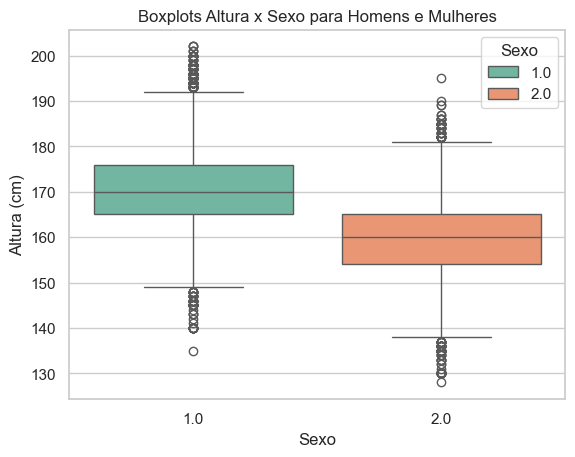

In [810]:
# Boxplot de alturas.

sns.boxplot(x = "Sexo", y = "Altura", data=df, palette="Set2", hue="Sexo")

plt.title("Boxplots Altura x Sexo para Homens e Mulheres")
plt.xlabel("Sexo")
plt.ylabel("Altura (cm)")
plt.show()

O boxplot, pelo intervalo interquartil, acusa algumas pessoas sendo outliers em relação à altura. Entretanto, acredito que não seja realmente isso.

In [811]:
df['Altura'].describe()

count    65888.000000
mean       165.078239
std          9.749571
min        128.000000
25%        159.000000
50%        165.000000
75%        172.000000
max        202.000000
Name: Altura, dtype: float64

- Altura Mínima: 1,28m
- Altura Máxima: 2,0m
- Desvio Padrão: 9.71

In [812]:
desvio_padrao = df['Altura'].std()
media = df['Altura'].mean()

limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 3 * desvio_padrao

print(f'Os limites superiores e inferiores utilizando a diferença de 3 desvios-padrão são: [{limite_inferior} - {limite_superior}]')

Os limites superiores e inferiores utilizando a diferença de 3 desvios-padrão são: [135.82952604691286 - 194.3269516121449]


In [813]:
outliers_index = df.loc[(df['Altura'] < limite_inferior) | (df['Altura'] > limite_superior)].index
df = df.copy()  # Cria uma cópia explícita
df.drop(outliers_index, inplace=True)


Outliers de altura removidos baseado em 3 desvios padrão da média.

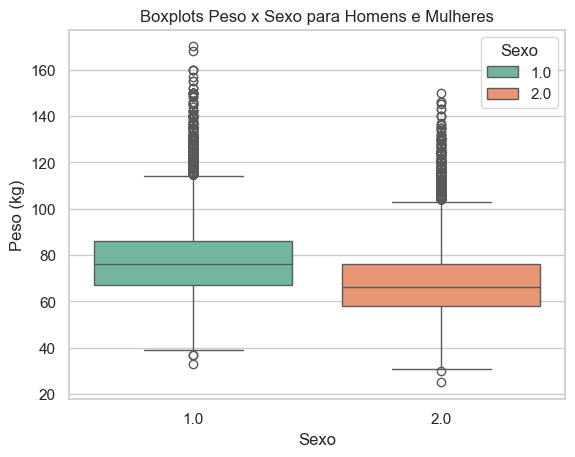

In [814]:
# Boxplot de pesos.

sns.boxplot(x = "Sexo", y = "Peso", data=df, palette="Set2", hue="Sexo")

plt.title("Boxplots Peso x Sexo para Homens e Mulheres")
plt.xlabel("Sexo")
plt.ylabel("Peso (kg)")
plt.show()

Pelo boxplot, principalmente para as mulheres, há a acusação de múltiplos outliers que se encontram acima do limite superior do IQR, o que é não são de fato outliers, apenas pessoas possívelmente obesas e que provavelmente possuem as comorbidades selecionadas por essa condição configurar-se como um **fator de risco**. 

O mais importante é avaliar o limite inferior, que seriam o caso de pessoas que pesam menos de 40kg com no mínimo 18 anos, oque configura-se como uma situação muito atípica.

In [815]:
def calculo_iqr(lista):
    
    lista = lista.sort_values()

    q1= np.percentile(lista, 25)
    q3 = np.percentile(lista, 75)

    iqr = q3 - q1

    return q1, q3, iqr

In [816]:
def calculo_outliers(lista):
    q1, q3, iqr = calculo_iqr(lista)

    #Limite inferior e superior IQR
    lim_inferior = q1 - (1.5*iqr)
    lim_superior = q3 + (1.5*iqr)
    print(f"Limites:[{lim_inferior} - {lim_superior}]")

    outliers_min = [elemento for elemento in lista if elemento < lim_inferior]
    outliers_max = [elemento for elemento in lista if elemento > lim_superior]

    outliers = outliers_min + outliers_max
    return outliers

In [817]:
outliers_peso = calculo_outliers(df["Peso"])

Limites:[32.0 - 112.0]


Os outliers para o peso estão:

- Abaixo de 33.5kg
- Acima de 109.5kg

Pesos acima de 109.5kg são comuns e se enquadram  em **sobrepeso ou obesidade**. Entretanto, pessoas que pesam menos de 33.5kg com 18 anos de idade não são comuns.

In [818]:
print(f"Quantidade de Possíveis Outliers (VARIÁVEL PESO): {len(outliers_peso)}")

Quantidade de Possíveis Outliers (VARIÁVEL PESO): 928


In [819]:
df.loc[(df["Peso"] <= 40) & (df['Sexo'] == 1), [ 'Condicao']].value_counts()

Condicao  
Saudavel      9
Hipertenso    4
HiperCVD      1
Name: count, dtype: int64

Observando o limite inferior do IQR, nota-se que há 20 homens que pesam menos de 40kg e que possuem no mínimo 18 anos de idade, são outliers e serão removidos.

Ademais, há 2 mulheres que também se encontram abaixo do IQR, ou seja, pesam menos de 31.5kg e serão removidas.

In [820]:
# Remoção dos outliers nos homens.

index_removido = df.loc[(df["Peso"] <=40) & (df["Sexo"]==1)].index
df.drop(index_removido, inplace=True)

# Remoção dos outliers nas mulheres.
index_removido = df.loc[(df["Peso"] <=31.5) & (df["Sexo"]==2)].index
df.drop(index_removido, inplace=True)

### 3.2.3. Codificação: IMC

In [821]:
# Fórmula, cálculo do IMC
df["IMC"] = df["Peso"] / (df["Altura"]/100)**2

In [822]:
bins = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
labels = ['Baixo Peso', 'Peso Ideal', 'Sobrepeso', 'Obeso']


#Categorizando as pessoas de acordo com o valor de IMC.
df["Categoria_IMC"] = pd.cut(df["IMC"], bins=bins, labels=labels)

In [823]:
df["Categoria_IMC"].value_counts()

Categoria_IMC
Sobrepeso     25339
Peso Ideal    24803
Obeso         14268
Baixo Peso     1268
Name: count, dtype: int64

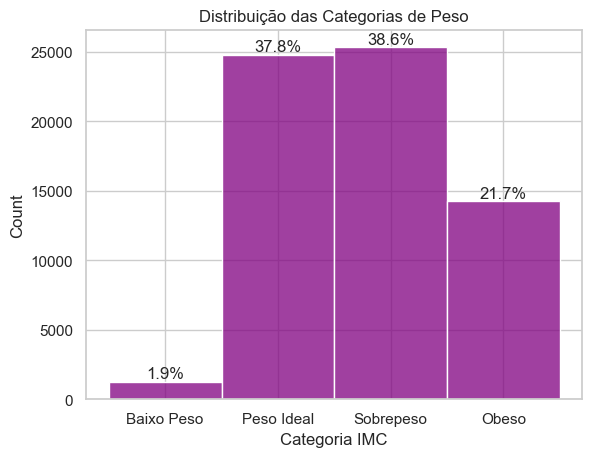

In [824]:
ax = sns.histplot(data=df, x='Categoria_IMC', color='purple')

# Adicionar rótulos de frequência relativa no topo das colunas
for p in ax.patches:
    # Calcula a frequência relativa como um percentual
    frequency_relative = (p.get_height() / len(df)) * 100
    # Adiciona o rótulo na barra
    ax.annotate(f'{frequency_relative:.1f}%',  # Formato percentual
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição do rótulo
                ha='center', va='bottom')  # Centraliza o rótulo

plt.title('Distribuição das Categorias de Peso')
plt.xlabel('Categoria IMC')

plt.show()

Como podemos observar pelo Histograma, 59.7% estão acima do peso.

In [825]:
df.drop(["IMC", "Peso", "Altura"], axis=1, inplace=True)

### 3.2.4. Discretização Categoria IMC

A categoria do IMC tem uma ordem natural, logo aqui é preciso aplicar um LabelEncoder para que o modelo possa utilizar futuramente.

In [826]:
df["Categoria_IMC"] = [0 if x == "Baixo Peso" else 1 if x == "Peso Ideal" else 2 if x == "Sobrepeso" else 3 for x in df["Categoria_IMC"]]

## **3.3. Aspecto - Antropometria**

### 3.3.1. Nulos

In [827]:
colunas_especificas = [
             "Idade",
             "Sexo",
             "Raca_etnia",
]

df[colunas_especificas].isnull().sum()

Idade         0
Sexo          0
Raca_etnia    0
dtype: int64

Não há nulos.

### 3.3.2. Codificação: Categorização das Raças: Pretos e Não Pretos

Como visto na literatura dos artigos científicos da área médica, as pessoas que são pardas e pretas possuem um **fator genético que as predispõe à desenvolver hipertensão**.

Portanto, é válido categorizar as diferentes raças e etnias em Pretos e Não Pretos para restringir o escopo do problema.

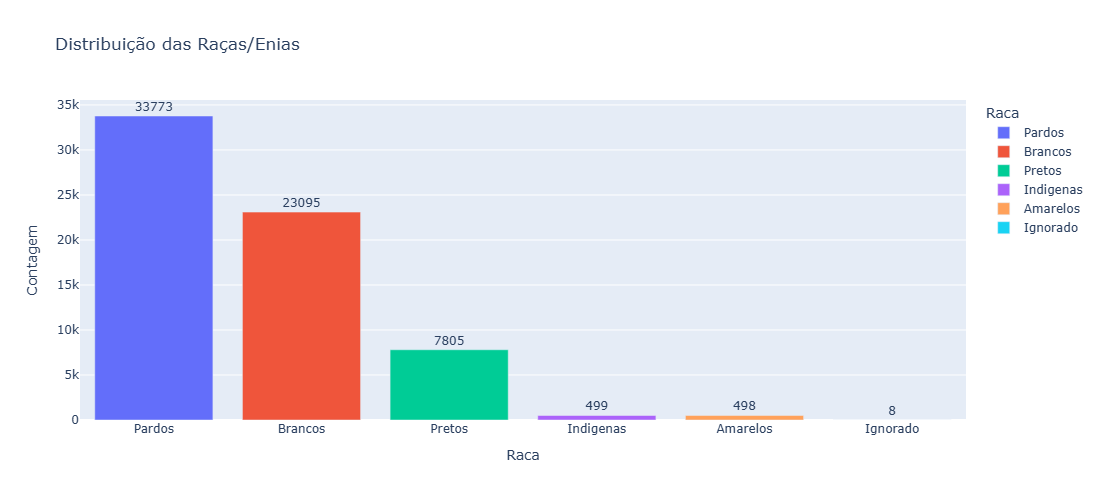

In [828]:
#Dicionario para mapeamento.
dicionario = {
    1: 'Brancos',
    2: 'Pretos',
    3: 'Amarelos',
    4: 'Pardos',
    5: 'Indigenas',
    9: 'Ignorado',
}

contagem = df["Raca_etnia"].value_counts().reset_index()
contagem.columns = ['Raca', 'Contagem']

#mapeamento das instruções na própria coluna Instrução.
contagem['Raca'] = contagem['Raca'].map(dicionario)
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Raca',
    y='Contagem',
    labels={'count': 'Contagem', 'Raca_etnia': 'Raça/Etnia'},
    title='Distribuição das Raças/Enias',
    color='Raca',
    text='Contagem'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

A maioria das pessoas consideram-se pardas, em seguida temos os brancos e em terceiro lugar as pessoas pretas.

In [829]:
# Criar uma nova coluna com base nas condições
conditions = [
    df["Raca_etnia"].isin([1, 3, 5, 9]),  # Brancos, amarelos, indígenas, ignorados
    df["Raca_etnia"] == 2,               # Pretos
    df["Raca_etnia"] == 4                # Pardos
]

choices = ['Branco', 'Preto', 'Pardo']

# Aplicar as condições e atribuir os valores
df["Raca_etnia_categoria"] = np.select(conditions, choices, default='Outros')

# Opcional: conferir a distribuição das categorias
print(df["Raca_etnia_categoria"].value_counts())


Raca_etnia_categoria
Pardo     33773
Branco    24100
Preto      7805
Name: count, dtype: int64


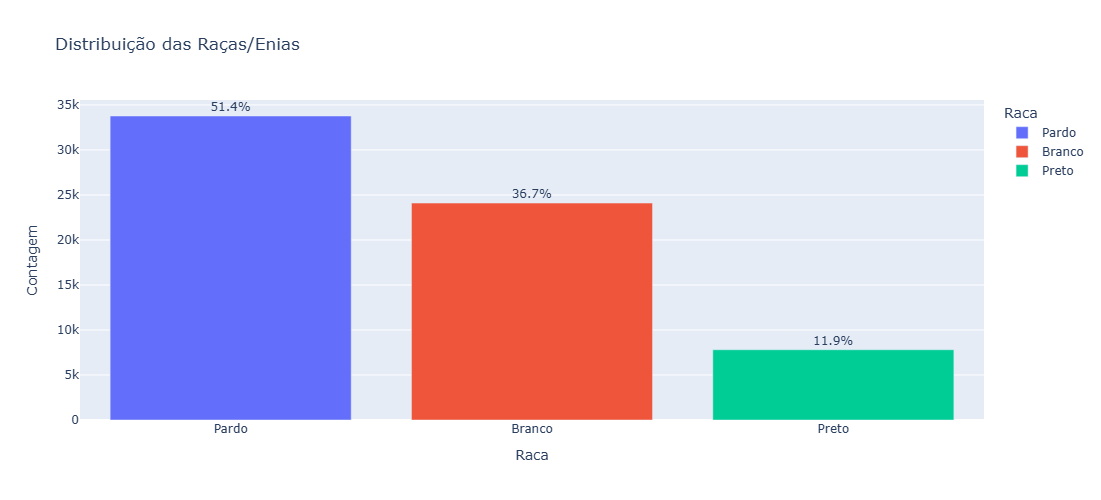

In [830]:
contagem = df["Raca_etnia_categoria"].value_counts().reset_index()
contagem.columns = ['Raca', 'Contagem']
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Calculando a frequência relativa.
contagem['Frequencia (%)'] = (contagem['Contagem'] / contagem['Contagem'].sum()) * 100


# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Raca',
    y='Contagem',
    labels={'count': 'Contagem', 'Raca_etnia_categoria': 'Raça/Etnia'},
    title='Distribuição das Raças/Enias',
    color='Raca',
    text=contagem['Frequencia (%)'].round(1).astype(str) + '%'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

### 3.3.3. Aplicação do OneHotEncoder nas Raças/Etnias

In [831]:
from sklearn.preprocessing import OneHotEncoder

In [832]:
# Instanciar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False retorna um array denso

# Ajustar e transformar os dados
encoded = encoder.fit_transform(df[["Raca_etnia_categoria"]])

# Criar um DataFrame com os valores codificados
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(["Raca_etnia_categoria"]),
    index=df.index
)

# Concatenar o DataFrame original com os codificados
df = pd.concat([df, encoded_df], axis=1)

In [833]:
df.columns

Index(['Sexo', 'Idade', 'Raca_etnia', 'Consumo_sal', 'Atividades_fisicas',
       'Freq_atividade_fisica', 'P050', 'P052', 'P05401', 'P05404', 'P05407',
       'P05410', 'P05413', 'P05416', 'P05419', 'Frequencia_alcoolismo',
       'Qtd_alcool_semanal', 'Qtd_doses_alcoolicas', 'Ficou_internado',
       'Ultima_consulta', 'Percepcao_estado_saude', 'Tem_plano',
       'Cansa_subida', 'Cansa_plano', 'Alfabetizacao', 'Escolaridade',
       'Area_moradia', 'Esgoto', 'Destino_lixo', 'Acesso_internet',
       'Abastecimento_agua', 'Faixa_salarial', 'Tem_diabetes', 'Condicao',
       'Categoria_IMC', 'Raca_etnia_categoria', 'Raca_etnia_categoria_Branco',
       'Raca_etnia_categoria_Pardo', 'Raca_etnia_categoria_Preto'],
      dtype='object')

OneHotEncoder aplicado em Raça, agora vamos dropar as colunas de Raca_etnia_categoria e Raca_etnia

In [834]:
df.drop(["Raca_etnia", "Raca_etnia_categoria"], axis=1, inplace=True)

### 3.3.3. Categorização das Faixas Etárias

In [835]:
# Criando as faixas etárias
bins = [18, 25, 35, 45, 60, 80, 100]  # Intervalos
labels = ['18-24', '25-34', '35-44', '45-59', '60-79', '80+']  # Rótulos

df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

In [836]:
# Dicionário de mapeamento
faixa_map = {'18-24': 0, '25-34': 1, '35-44': 2, '45-59': 3, '60-79': 4, '80+': 5}

# Aplicando o mapeamento
df['Faixa_Etaria_Numerica'] = df['Faixa_Etaria'].map(faixa_map)
df.dropna(subset=['Faixa_Etaria_Numerica'], inplace=True)
df['Faixa_Etaria_Numerica'] = df['Faixa_Etaria_Numerica'].astype('int64')

In [837]:
df.drop(["Idade", "Faixa_Etaria"], axis=1, inplace=True)

## **3.4. Aspecto - Hábitos Alimentares**

In [838]:
colunas_especificas = [
             "Consumo_sal",
]

df[colunas_especificas].isnull().sum()

Consumo_sal    0
dtype: int64

Não há nulos no consumo de sal.

## **3.5 Aspecto - Atividades Físicas**

### 3.5.1. Nulos

In [839]:
colunas_especificas = [
     "Atividades_fisicas",
     "Freq_atividade_fisica",
]

df[colunas_especificas].isnull().sum()

Atividades_fisicas           0
Freq_atividade_fisica    40030
dtype: int64

In [840]:
df[(df["Atividades_fisicas"]==2) & (df["Freq_atividade_fisica"].isna())]

,Sexo,Consumo_sal,Atividades_fisicas,Freq_atividade_fisica,P050,P052,P05401,P05404,P05407,P05410,...,Acesso_internet,Abastecimento_agua,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica
0,2.0,3.0,2.0,NaN,1.0,NaN,5.0,5.0,5.0,5.0,...,1.0,3.0,2.0,2.0,Saudavel,2,0.0,1.0,0.0,0
1,2.0,4.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,2.0,Saudavel,3,0.0,0.0,1.0,3
5,2.0,4.0,2.0,NaN,2.0,NaN,2.0,5.0,5.0,5.0,...,1.0,1.0,1.0,2.0,Saudavel,1,1.0,0.0,0.0,2
9,1.0,2.0,2.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,1.0,2.0,6.0,2.0,Saudavel,3,0.0,1.0,0.0,0
10,2.0,3.0,2.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,1.0,2.0,4.0,2.0,Saudavel,2,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66556,2.0,4.0,2.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,1.0,HiperCVD,3,1.0,0.0,0.0,3
66557,1.0,3.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,...,1.0,3.0,3.0,2.0,HiperCVD,2,1.0,0.0,0.0,4
66558,1.0,4.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,...,2.0,4.0,4.0,1.0,HiperCVD,2,0.0,0.0,1.0,4
66559,2.0,4.0,2.0,NaN,1.0,NaN,1.0,5.0,5.0,5.0,...,1.0,2.0,1.0,2.0,HiperCVD,1,1.0,0.0,0.0,2


Todos os nulos que estão contidos na frequência da prática de atividades físicas responderam que não se exercitaram nos últimos 3 meses. Ou seja, eles não se exercitam em nenhum dia da semana.

In [841]:
df["Freq_atividade_fisica"] = df["Freq_atividade_fisica"].fillna(0)

In [842]:
df["Freq_atividade_fisica"].value_counts()

Freq_atividade_fisica
0.0    40867
3.0     5869
2.0     4691
5.0     4485
1.0     4055
7.0     2541
4.0     2029
6.0     1124
Name: count, dtype: int64

### 3.5.2. Categorização da Frequência de Atividades Físicas.

In [843]:
# Categorizar a frequência de atividade física
conditions = [
    df["Freq_atividade_fisica"] == 0,                  # Não se exercita
    df["Freq_atividade_fisica"].between(1, 3, 'both'),  # Exercita-se pouco
    df["Freq_atividade_fisica"] > 3                   # Exercita-se bem
]

choices = [0, 1, 2] #0 não se exercita, 1 se exercita pouco, 2 se exercita bem.

# Aplicar as categorias
df["Nivel_atividade_fisica"] = np.select(conditions, choices, default="Desconhecido")

# Verificar a distribuição
print(df["Nivel_atividade_fisica"].value_counts())


Nivel_atividade_fisica
0    40867
1    14615
2    10179
Name: count, dtype: int64


Agora já é possível dropar as colunas de freq_atividade_fisica e atividades_fisicas.

In [844]:
df.drop(["Freq_atividade_fisica", "Atividades_fisicas"], axis=1, inplace=True)

## **3.6. Aspecto - Tabagismo**

### 3.6.1. Nulos

In [845]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050          0
P052       8149
P05401    57512
P05404    57512
P05407    57512
P05410    57512
P05413    57512
P05416    57512
P05419    57512
dtype: int64

Há muitos nulos nos produtos de tabaco, mas é necessário analisar se a pessoa fuma um produto X mas não fuma um produto Y.

In [846]:
df.loc[(df["P050"] == 3) & (df["P05401"].isna())]

,Sexo,Consumo_sal,P050,P052,P05401,P05404,P05407,P05410,P05413,P05416,...,Abastecimento_agua,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica
1,2.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,2.0,Saudavel,3,0.0,0.0,1.0,3,0
2,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,2.0,Saudavel,1,0.0,0.0,1.0,3,1
3,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,Saudavel,0,0.0,1.0,0.0,1,1
4,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,2.0,Saudavel,2,0.0,1.0,0.0,2,2
6,1.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,2.0,Saudavel,2,0.0,1.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,1.0,HiperCVD,2,1.0,0.0,0.0,3,0
66556,2.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,1.0,HiperCVD,3,1.0,0.0,0.0,3,0
66557,1.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,2.0,HiperCVD,2,1.0,0.0,0.0,4,0
66558,1.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,1.0,HiperCVD,2,0.0,0.0,1.0,4,0


Olha que **interessante!** As pessoas que não responderam sobre o consumo e a frequência dos produtos do tabaco é porque **elas não fumam!** Logo, vamos substituir todos esses nulos por 0.

**Conclusão:** Substituição dos nulos por 0, que significa que a pessoa não usa esse tipo de produto.

In [847]:
# Lista das colunas a serem 'consertados' os valores nulos
colunas_a_substituir = ["P05401", "P05404", "P05407", "P05410", "P05413", "P05416", "P05419"]

# Substituindo por 0, coluna por coluna
for coluna in colunas_a_substituir:
    df.loc[(df["P050"] == 3) & (df[coluna].isna()), coluna] = 0

In [848]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050         0
P052      8149
P05401       0
P05404       0
P05407       0
P05410       0
P05413       0
P05416       0
P05419       0
dtype: int64

In [849]:
df.loc[(df["P050"] == 1) & (df["P052"].isna())]

,Sexo,Consumo_sal,P050,P052,P05401,P05404,P05407,P05410,P05413,P05416,...,Abastecimento_agua,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica
0,2.0,3.0,1.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,...,3.0,2.0,2.0,Saudavel,2,0.0,1.0,0.0,0,0
18,1.0,3.0,1.0,NaN,1.0,5.0,5.0,5.0,5.0,5.0,...,2.0,4.0,2.0,Saudavel,1,0.0,1.0,0.0,3,0
22,1.0,1.0,1.0,NaN,1.0,2.0,5.0,5.0,5.0,5.0,...,3.0,3.0,2.0,Saudavel,1,0.0,1.0,0.0,3,0
35,1.0,4.0,1.0,NaN,1.0,2.0,5.0,5.0,5.0,5.0,...,2.0,5.0,2.0,Saudavel,2,1.0,0.0,0.0,2,1
40,1.0,3.0,1.0,NaN,1.0,5.0,5.0,5.0,5.0,5.0,...,3.0,1.0,2.0,Saudavel,1,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66510,1.0,3.0,1.0,NaN,5.0,5.0,5.0,3.0,3.0,5.0,...,1.0,7.0,2.0,HiperCVD,3,1.0,0.0,0.0,3,0
66521,1.0,4.0,1.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,2.0,HiperCVD,3,1.0,0.0,0.0,3,1
66522,1.0,2.0,1.0,NaN,1.0,5.0,5.0,5.0,5.0,5.0,...,1.0,7.0,2.0,HiperCVD,2,1.0,0.0,0.0,3,0
66551,1.0,3.0,1.0,NaN,1.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,1.0,HiperCVD,1,1.0,0.0,0.0,4,0


Muitas pessoas que fumam atualmente, não foi aplicadas à elas a pergunta de fumar no passado. De 2572 nulos, 2389 são fumantes diários.

**Conclusão:** para essas pessoas, vamos substituir os nulos por 1 que significa que no passado fumaram diariamente.

In [850]:
df.loc[(df["P050"] == 2) & (df["P052"].isna())]

,Sexo,Consumo_sal,P050,P052,P05401,P05404,P05407,P05410,P05413,P05416,...,Abastecimento_agua,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica
5,2.0,4.0,2.0,NaN,2.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,2.0,Saudavel,1,1.0,0.0,0.0,2,0
47,1.0,3.0,2.0,NaN,2.0,5.0,5.0,5.0,5.0,5.0,...,3.0,2.0,2.0,Saudavel,2,1.0,0.0,0.0,1,1
65,1.0,3.0,2.0,NaN,3.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,2.0,Saudavel,2,0.0,1.0,0.0,3,0
129,1.0,3.0,2.0,NaN,4.0,5.0,5.0,5.0,5.0,5.0,...,2.0,7.0,2.0,Saudavel,1,0.0,1.0,0.0,2,2
196,1.0,3.0,2.0,NaN,3.0,5.0,5.0,5.0,5.0,5.0,...,1.0,3.0,2.0,Saudavel,1,1.0,0.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65807,2.0,3.0,2.0,NaN,2.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,HiperCVD,3,1.0,0.0,0.0,3,0
65843,1.0,3.0,2.0,NaN,5.0,2.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,HiperCVD,2,1.0,0.0,0.0,3,0
66092,2.0,3.0,2.0,NaN,2.0,5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,2.0,HiperCVD,1,1.0,0.0,0.0,4,1
66384,2.0,4.0,2.0,NaN,2.0,5.0,5.0,5.0,5.0,5.0,...,3.0,4.0,1.0,HiperCVD,3,1.0,0.0,0.0,3,1


A mesma coisa ocorre para pessoas que responderam que fumam menos que diariamente. Não foi aplicada a pergunta de tabagismo delas no passado, vamos substituir esses valores nulos por 2.

**Conclusão:** para as pessoas que fumam menos que diariamente atualmente, receberão 2 para o tabagismo no passado.

In [851]:
# Substituição dos nulos das pessoas que fumam diariamente mas que não tiveram a pergunta do passado aplicada.
df.loc[(df["P050"] == 1) & (df["P052"].isna()), "P052"] = 1

# Substituição dos nulos das pessoas que fumam menos que diariamente mas que não tiveram a pergunta do passado aplicada.
df.loc[(df["P050"] == 2) & (df["P052"].isna()), "P052"] = 2

In [852]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050      0
P052      0
P05401    0
P05404    0
P05407    0
P05410    0
P05413    0
P05416    0
P05419    0
dtype: int64

Todos os nulos foram devidamente tratados. Agora, vamos criar classificações de hábito de tabagismo para as pessoas, de maneira que vamos fundir atributos do tabaco. Assim, será feita a **redução de dimensionalidade**

### 3.6.2. Categorização dos Fumantes

O objetivo dessa etapa é dizer o seguinte:

- Fuma muito
- Fuma razoavelmente
- Fuma pouco
- Não fuma

In [853]:
def categorizar_fumantes(linha):

    if linha["P050"] == 3 and linha["P052"] == 1: # Se não fuma atualmente, mas fumou diariamente no passado -> FUMA RAZOAVEL
        return 2
    elif linha["P050"] == 3 and linha["P052"] == 2: # Se não fuma atualmente mas fumou menos que diariamente no passado -> FUMA POUCO.
        return 3
    elif linha["P050"] == 1: # Se fuma diariamente atualmente -> FUMA MUITO.
        return 1
    elif linha["P050"] == 2: # Se fuma menos que diariamente atualmente -> DEPENDE
        if linha["P05401"] == 1 or linha["P05404"] == 1 or linha["P05410"] == 1 or linha["P05413"] == 1 or linha["P05416"] == 1 or linha["P05419"] == 1:
            return 1 # fuma muito.
        elif linha["P05401"] == 2 or linha["P05404"] == 2 or linha["P05410"] == 2 or linha["P05413"] == 2 or linha["P05416"] == 2 or linha["P05419"] == 2:
            return 2 #fuma razoavelmente.
        elif linha["P05401"] == 3 or linha["P05404"] == 3 or linha["P05410"] == 3 or linha["P05413"] == 3 or linha["P05416"] == 3 or linha["P05419"] == 3:
            return 3 # fuma pouco.
        elif linha["P05401"] == 4 or linha["P05404"] == 4 or linha["P05410"] == 4 or linha["P05413"] == 4 or linha["P05416"] == 4 or linha["P05419"] == 4:
            return 3 # fuma pouco.
         
    elif linha["P050"] == 3 and linha["P052"] == 3: # Se não fuma atualmente e não fumou no passado -> NÃO FUMA. 
        return 4
    else: # Se houver ignorados, serão considerados como não fumantes
        return 4
    

In [854]:
# Aplicando a função a cada linha do DataFrame
df["Categoria_tabagismo"] = df.apply(categorizar_fumantes, axis=1)

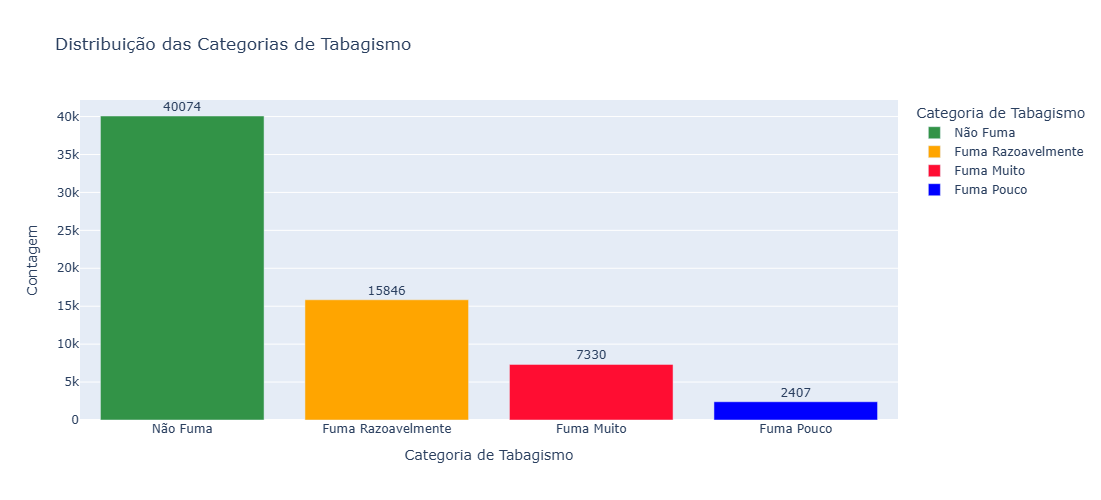

In [855]:
#Dicionario para mapeamento.
dicionario = {
    1: 'Fuma Muito',
    2: 'Fuma Razoavelmente',
    3: 'Fuma Pouco',
    4: 'Não Fuma'
}

contagem = df["Categoria_tabagismo"].value_counts().reset_index()
contagem.columns = ['Categoria_tabagismo', 'Contagem']

#mapeamento das instruções na própria coluna Instrução.
contagem['Categoria_tabagismo'] = contagem['Categoria_tabagismo'].map(dicionario)
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Categoria_tabagismo',
    y='Contagem',
    labels={'count': 'Contagem', 'Categoria_tabagismo': 'Categoria de Tabagismo'},
    title='Distribuição das Categorias de Tabagismo',
    color='Categoria_tabagismo',
    text='Contagem',
    color_discrete_sequence=["#329347", "#FFA500", "#FF0D32", "#0000FF"]
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

**Análise Gráfica:** A maioria das pessoas entrevistadas falaram que não fumam. Entretanto, se fôssemos apenas considerar pessoas que fumam ou não fumam teríamos quase 50% dos entrevistados fumantes e um pouco mais de 50% dos entrevistados não fumantes.

In [856]:
# Com a coluna 'Categoria_tabagismo' criada, as outras já não são mais interessantes para o modelo, vamos jogá-las fora.
df.drop(["P050", "P052", "P05401", "P05404", "P05407", "P05410", "P05413", "P05416", "P05419"], axis=1, inplace=True)

In [857]:
df.shape

(65661, 28)

## **3.7. Aspecto - Alcoolismo**

### 3.7.1. Nulos

In [858]:
colunas_especificas = [
             "Frequencia_alcoolismo",
             "Qtd_alcool_semanal",
             "Qtd_doses_alcoolicas",
]

df[colunas_especificas].isnull().sum()

Frequencia_alcoolismo        0
Qtd_alcool_semanal       47673
Qtd_doses_alcoolicas     39503
dtype: int64

In [859]:
len(df.loc[(df["Frequencia_alcoolismo"] == 1) & (df["Qtd_alcool_semanal"].isna())])

39503

Quantidade de pessoas que não responderam sobre a **frequência semanal, pelo fato de não beberem bebidas álcoolicas**.

In [860]:
len(df.loc[(df["Frequencia_alcoolismo"] == 1) & (df["Qtd_doses_alcoolicas"].isna())])

39503

Quantidade de pessoas que não responderam sobre a **quantidade de doses, pelo fato de não beberem bebidas álcoolicas.**

In [861]:
# Lista das colunas a serem 'consertados' os valores nulos
colunas_a_substituir = ["Qtd_alcool_semanal", "Qtd_doses_alcoolicas"]

# Substituindo por 0, coluna por coluna
for coluna in colunas_a_substituir:
    df.loc[(df["Frequencia_alcoolismo"] == 1) & (df[coluna].isna()), coluna] = 0

**Conclusão:** Nulos em relação a frequência semanal e diária substuidos por 0, isso significa que quem respondeu 0 é porque simplesmente não bebe.

In [862]:
colunas_especificas = [
             "Frequencia_alcoolismo",
             "Qtd_alcool_semanal",
             "Qtd_doses_alcoolicas",
]

df[colunas_especificas].isnull().sum()

Frequencia_alcoolismo       0
Qtd_alcool_semanal       8170
Qtd_doses_alcoolicas        0
dtype: int64

Ainda assim, há 10.364 valores nulos em relação à frequência semanal de consumo de bebidas álcoolicas. Essas pessoas que não responderam, são pessoas que bebem. Isso porque as que não bebem já foram tratadas anteriormente.

In [863]:
df.loc[df["Qtd_alcool_semanal"].isnull(), "Condicao"].value_counts()

Condicao
Saudavel      5859
Hipertenso    2038
HiperCVD       273
Name: count, dtype: int64

Desses 10.364 valores nulos, são:
- 8053 pessoas sem diagnóstico/saudáveis
- 2038 pessoas hipertensas
- 273 pessoas com doenças cardiovasculares e hipertensas

In [864]:
df_hipercvd = df.loc[df["Condicao"]== 'HiperCVD']
df_hipertensos = df.loc[df["Condicao"]=='Hipertenso']
df_sem_diagnostico = df.loc[df["Condicao"]=='Saudavel']

In [865]:
df_hipercvd["Qtd_alcool_semanal"].describe()

count    2727.000000
mean        0.382472
std         1.219805
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Qtd_alcool_semanal, dtype: float64

In [866]:
df_hipertensos["Qtd_alcool_semanal"].describe()

count    18595.000000
mean         0.487443
std          1.281961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Qtd_alcool_semanal, dtype: float64

In [867]:
df_sem_diagnostico["Qtd_alcool_semanal"].describe()

count    36169.000000
mean         0.650474
std          1.280881
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: Qtd_alcool_semanal, dtype: float64

Todas as três classes possuem uma média e um desvio padrão muito parecidos em relação a qtd de álcool ingeridos semanalmente de aproximadamente 1 dia por semana.

Já foi dito anteriormente que esses nulos são pessoas que bebem porque na pergunta em relação a beber, eles responderam que bebem.

In [868]:
df_hipercvd.loc[df_hipercvd["Frequencia_alcoolismo"]==2]

,Sexo,Consumo_sal,Frequencia_alcoolismo,Qtd_alcool_semanal,Qtd_doses_alcoolicas,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Cansa_subida,...,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica,Categoria_tabagismo
63550,2.0,4.0,2.0,NaN,2.0,2.0,3.0,3.0,1.0,2.0,...,5.0,2.0,HiperCVD,2,0.0,1.0,0.0,3,2,2.0
63562,1.0,4.0,2.0,NaN,2.0,1.0,3.0,3.0,1.0,2.0,...,7.0,2.0,HiperCVD,3,1.0,0.0,0.0,3,0,4.0
63596,1.0,4.0,2.0,NaN,6.0,1.0,1.0,4.0,2.0,1.0,...,2.0,2.0,HiperCVD,3,1.0,0.0,0.0,3,0,1.0
63598,2.0,4.0,2.0,NaN,1.0,2.0,1.0,4.0,2.0,1.0,...,4.0,2.0,HiperCVD,2,0.0,1.0,0.0,3,2,2.0
63603,1.0,3.0,2.0,NaN,3.0,2.0,3.0,2.0,2.0,2.0,...,4.0,2.0,HiperCVD,3,1.0,0.0,0.0,2,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66521,1.0,4.0,2.0,NaN,6.0,2.0,3.0,4.0,1.0,2.0,...,4.0,2.0,HiperCVD,3,1.0,0.0,0.0,3,1,1.0
66527,2.0,3.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,...,7.0,2.0,HiperCVD,1,0.0,1.0,0.0,2,1,4.0
66533,2.0,2.0,2.0,NaN,2.0,2.0,4.0,3.0,2.0,1.0,...,3.0,2.0,HiperCVD,2,0.0,1.0,0.0,1,0,2.0
66554,2.0,4.0,2.0,NaN,2.0,2.0,1.0,3.0,2.0,2.0,...,5.0,1.0,HiperCVD,3,0.0,1.0,0.0,3,1,4.0


In [869]:
df_sem_diagnostico.loc[df_sem_diagnostico["Frequencia_alcoolismo"]==2]

,Sexo,Consumo_sal,Frequencia_alcoolismo,Qtd_alcool_semanal,Qtd_doses_alcoolicas,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Cansa_subida,...,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica,Categoria_tabagismo
0,2.0,3.0,2.0,NaN,5.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,Saudavel,2,0.0,1.0,0.0,0,0,1.0
10,2.0,3.0,2.0,NaN,3.0,2.0,3.0,1.0,2.0,2.0,...,4.0,2.0,Saudavel,2,1.0,0.0,0.0,1,0,4.0
12,1.0,4.0,2.0,NaN,2.0,2.0,3.0,1.0,1.0,2.0,...,7.0,2.0,Saudavel,1,1.0,0.0,0.0,3,1,4.0
13,2.0,4.0,2.0,NaN,4.0,2.0,3.0,1.0,1.0,2.0,...,5.0,2.0,Saudavel,1,0.0,1.0,0.0,0,0,4.0
21,2.0,3.0,2.0,NaN,3.0,2.0,1.0,4.0,2.0,2.0,...,2.0,2.0,Saudavel,3,0.0,1.0,0.0,3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42667,1.0,3.0,2.0,NaN,3.0,2.0,3.0,1.0,2.0,2.0,...,3.0,NaN,Saudavel,2,1.0,0.0,0.0,0,0,4.0
42668,1.0,4.0,2.0,NaN,3.0,2.0,4.0,1.0,2.0,2.0,...,2.0,NaN,Saudavel,2,0.0,1.0,0.0,2,2,2.0
42670,1.0,2.0,2.0,NaN,2.0,2.0,3.0,1.0,2.0,2.0,...,3.0,2.0,Saudavel,2,0.0,1.0,0.0,1,1,2.0
42702,1.0,2.0,2.0,NaN,3.0,2.0,4.0,3.0,2.0,2.0,...,2.0,2.0,Saudavel,2,1.0,0.0,0.0,3,0,3.0


In [870]:
df_hipertensos.loc[df_hipertensos["Frequencia_alcoolismo"]==2]

,Sexo,Consumo_sal,Frequencia_alcoolismo,Qtd_alcool_semanal,Qtd_doses_alcoolicas,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Cansa_subida,...,Faixa_salarial,Tem_diabetes,Condicao,Categoria_IMC,Raca_etnia_categoria_Branco,Raca_etnia_categoria_Pardo,Raca_etnia_categoria_Preto,Faixa_Etaria_Numerica,Nivel_atividade_fisica,Categoria_tabagismo
42742,2.0,3.0,2.0,NaN,5.0,2.0,2.0,3.0,2.0,2.0,...,2.0,2.0,Hipertenso,2,1.0,0.0,0.0,3,1,2.0
42748,1.0,4.0,2.0,NaN,10.0,2.0,3.0,2.0,1.0,2.0,...,6.0,2.0,Hipertenso,2,0.0,1.0,0.0,4,1,2.0
42753,1.0,3.0,2.0,NaN,1.0,2.0,4.0,3.0,2.0,2.0,...,4.0,2.0,Hipertenso,3,1.0,0.0,0.0,2,0,4.0
42755,2.0,2.0,2.0,NaN,1.0,2.0,1.0,3.0,2.0,2.0,...,3.0,2.0,Hipertenso,3,0.0,1.0,0.0,1,0,4.0
42767,2.0,4.0,2.0,NaN,1.0,2.0,4.0,2.0,1.0,2.0,...,5.0,2.0,Hipertenso,3,1.0,0.0,0.0,4,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63478,2.0,4.0,2.0,NaN,6.0,2.0,4.0,2.0,1.0,2.0,...,2.0,2.0,Hipertenso,2,0.0,1.0,0.0,3,1,4.0
63482,2.0,4.0,2.0,NaN,8.0,2.0,1.0,5.0,2.0,1.0,...,1.0,2.0,Hipertenso,2,0.0,1.0,0.0,4,2,2.0
63489,2.0,4.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,...,3.0,2.0,Hipertenso,3,0.0,0.0,1.0,3,1,2.0
63507,2.0,3.0,2.0,NaN,1.0,2.0,4.0,2.0,2.0,2.0,...,4.0,2.0,Hipertenso,2,0.0,1.0,0.0,3,0,4.0


Nas três classes, o número de pessoas que são têm a informação nula em relação à quantidade semanal que bebem são as mesmas pessoas que responderam que bebem 1 vez ou menos por mês.

Logo, imputar '1' para a frequência semanal seria **equivocado**, já que elas já afirmaram beber 1 vez ou menos ao mês. Vamos preencher esses nulos com o valor 0 que significa nunca ou menos de uma vez por semana.

In [871]:
df["Qtd_alcool_semanal"] = df["Qtd_alcool_semanal"].fillna(0)

### 3.7.2. Outliers

In [872]:
df["Qtd_doses_alcoolicas"].describe()

count    65661.000000
mean         1.939355
std          3.834555
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         96.000000
Name: Qtd_doses_alcoolicas, dtype: float64

Há pessoas que tomam 50 doses por dia? Com certeza representa um valor atípico, estamos falando de uma quantidade muito grande de álcool diária mesmo que seja distríbuida. Vamos aprofundar.

In [873]:
len(df.loc[df["Qtd_doses_alcoolicas"] >= 15])

998

In [874]:
df.loc[df["Qtd_doses_alcoolicas"] >= 15, "Condicao"].value_counts()

Condicao
Saudavel      804
Hipertenso    177
HiperCVD       17
Name: count, dtype: int64

Outliers. Pessoas que consomem mais de 15 doses de álcool distorcem a grande parte dos dados.

In [875]:
index_removidos  = df.loc[df["Qtd_doses_alcoolicas"] >= 15].index
df.drop(index_removidos, inplace=True)

Outliers removidos.

### 3.7.3. Categorização do Alcoolismo

In [876]:
def categorizar_alcoolismo(row):
    # Caso a pessoa não consuma álcool (Frequência == 1)
    if row['Frequencia_alcoolismo'] == 1:
        return 0  # Não alcoólico
    
    # Caso a pessoa seja um bebedor social (Pouco consumo)
    if row['Qtd_doses_alcoolicas'] < 1 and row['Qtd_alcool_semanal'] < 3 and row['Frequencia_alcoolismo'] == 2:
        return 1  # Bebedor social
    
    # Caso a pessoa seja um bebedor moderado: Bebe de 1 a 2 doses no dia de beber, ou até 3 dias na semana
    if (row['Qtd_doses_alcoolicas'] >= 1 and row['Qtd_doses_alcoolicas'] <= 2) or row['Qtd_alcool_semanal'] <= 3:
        if row['Frequencia_alcoolismo'] == 3:  # Bebe uma vez ou mais por mês
            return 2  # Bebedor moderado
    
    # Caso a pessoa seja um bebedor frequente: Bebe mais de 2 doses no dia de beber ou até 4 dias na semana
    if row['Qtd_doses_alcoolicas'] > 2 or row['Qtd_alcool_semanal'] <= 4:
        if row['Frequencia_alcoolismo'] == 4:  # Bebe várias vezes por mês
            return 3  # Bebedor frequente
    
    # Caso a pessoa seja um bebedor excessivo (alcoólatra): Consome mais de 3 doses por dia ou mais de 4 doses por semana
    if row['Qtd_doses_alcoolicas'] > 3 or row['Qtd_alcool_semanal'] > 4:
        return 4  # Bebedor excessivo
    
    # Se não atender a nenhuma das condições específicas acima, classifique como bebedor frequente
    return 3  # Garantir que qualquer outro caso caia como bebedor frequente

In [877]:
df['categoria_alcoolismo'] = df.apply(categorizar_alcoolismo, axis=1)

In [878]:
df['categoria_alcoolismo'].value_counts()

categoria_alcoolismo
0    39503
2    15967
3     5460
4     3733
Name: count, dtype: int64

In [879]:
# Dropar as colunas de alcool que não são mais necessárias após a categorização.
df.drop(["Frequencia_alcoolismo", "Qtd_doses_alcoolicas", "Qtd_alcool_semanal",], axis=1, inplace=True)

## **3.8. Aspecto - Acompanhamento Médico**

### 3.8.1. Nulos

In [880]:
colunas_especificas = [
             "Ultima_consulta",
             "Ficou_internado",
             "Tem_plano",
             "Percepcao_estado_saude",
            "Cansa_subida",
            "Cansa_plano",
            "Tem_diabetes"
]

df[colunas_especificas].isnull().sum()

Ultima_consulta              0
Ficou_internado              0
Tem_plano                    0
Percepcao_estado_saude       0
Cansa_subida              1370
Cansa_plano               1370
Tem_diabetes              4242
dtype: int64

In [881]:
# Relação: Pessoa fuma atualmente x cansa subida
len(df.loc[(df["Cansa_subida"].isna()) & (df["Categoria_tabagismo"] == 1)])

117

In [882]:
len(df.loc[(df["Cansa_subida"].isna()) & (df["Categoria_tabagismo"] == 2)])

562

In [883]:
len(df.loc[(df["Cansa_subida"].isna()) & (df["Categoria_tabagismo"] == 3)])

43

In [884]:
len(df.loc[(df["Cansa_subida"].isna()) & (df["Categoria_tabagismo"] == 4)])

648

de 1.180 nulos que cansam na subida há:

- 155 que fumam muito.
- 723 que fumam razoavelmente.
- 60 que fumam pouco.
- 850 que não fumam.

In [885]:
len(df.loc[(df["Cansa_plano"].isna()) & (df["Cansa_subida"].isna())])

1370

In [886]:
df.loc[(df["Cansa_plano"].isna()) & (df["Cansa_subida"].isna()), 'Condicao'].value_counts()

Condicao
Hipertenso    831
HiperCVD      271
Saudavel      268
Name: count, dtype: int64

Para as pessoas saudáveis: será imputado que não se cansam, para o hiperCVD será imputado que se cansam e para os hipertensos serão descartados.

In [887]:
# HiperCVD.
df.loc[(df["Cansa_plano"].isna()) & (df["Cansa_subida"].isna()) & (df['Condicao'] == 'HiperCVD'), ['Cansa_plano', 'Cansa_subida']] = 1

# Saudáveis.
df.loc[(df["Cansa_plano"].isna()) & (df["Cansa_subida"].isna()) & (df['Condicao'] == 'Saudavel'), ['Cansa_plano', 'Cansa_subida']] = 2

# Exclui o resto dos nulos = hipertensos apenas.
df = df.dropna(subset=['Cansa_plano', 'Cansa_subida'])

In [888]:
df["Cansa_plano"].isna().sum()

0

In [889]:
df.loc[df["Tem_diabetes"].isna(), ["Condicao"]].value_counts()

Condicao  
Saudavel      3720
Hipertenso     485
HiperCVD        23
Name: count, dtype: int64

In [890]:
df = df.dropna(subset=['Tem_diabetes'])

## **3.9. Aspecto - Social**

### 3.9.1. Nulos

In [891]:
colunas_especificas = [
             "Alfabetizacao",
             "Escolaridade",
             "Area_moradia",
             "Esgoto",
             "Destino_lixo",
             "Acesso_internet",
             "Abastecimento_agua"
]

df[colunas_especificas].isnull().sum()

Alfabetizacao           0
Escolaridade            0
Area_moradia            0
Esgoto                766
Destino_lixo            0
Acesso_internet         0
Abastecimento_agua      0
dtype: int64

Há 909 valores nulos na coluna de Esgoto, que quer dizer como é o funcionamento de esgoto nessas residências.

In [892]:
df.loc[(df["Esgoto"].isna()), ['Condicao']].value_counts()

Condicao  
Saudavel      534
Hipertenso    205
HiperCVD       27
Name: count, dtype: int64

Desses 268 valores nulos em esgoto temos:

- 205 Hipertensos
- 27 HiperCVD
- 677 Saudáveis

In [893]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Saudavel'), ['Faixa_salarial', 'Destino_lixo', 'Area_moradia', 'Abastecimento_agua']]

,Faixa_salarial,Destino_lixo,Area_moradia,Abastecimento_agua
1166,3.0,1.0,1,1.0
1279,2.0,1.0,1,1.0
1300,2.0,1.0,1,2.0
1397,1.0,1.0,1,1.0
1625,5.0,1.0,1,1.0
...,...,...,...,...
32790,1.0,3.0,2,4.0
34159,3.0,3.0,2,4.0
39168,2.0,1.0,1,1.0
39367,4.0,1.0,1,1.0


In [894]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Saudavel'), ['Faixa_salarial']].value_counts()

Faixa_salarial
1.0               267
2.0               120
3.0               113
4.0                30
5.0                 2
6.0                 2
Name: count, dtype: int64

In [895]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Saudavel'), ['Escolaridade']].value_counts()

Escolaridade
2.0             274
1.0             121
5.0              60
4.0              38
3.0              30
7.0               9
6.0               2
Name: count, dtype: int64

Essas pessoas saudáveis/sem diagnóstico são em sua maioria pessoas que recebem menos de meio salário mínimo, vivem em zona rural com ensino fundamental incompleto ou nem estudou.

Portanto, são pessoas que provavelmente não possuem acesso ao saneamento básico.

In [896]:
# Substituição por Fossa Rudimentar para essas pessoas, que é o mais comum em propriedades rurais sem saneamento básico.
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Saudavel'), ['Esgoto']] = 4

In [897]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'HiperCVD'), ['Faixa_salarial', 'Destino_lixo', 'Area_moradia', 'Abastecimento_agua']]

,Faixa_salarial,Destino_lixo,Area_moradia,Abastecimento_agua
63650,1.0,3.0,2,1.0
63654,3.0,3.0,2,4.0
63658,5.0,5.0,2,2.0
63720,2.0,3.0,2,6.0
63749,3.0,3.0,2,1.0
63787,1.0,1.0,2,2.0
63922,3.0,3.0,2,2.0
63924,3.0,3.0,2,3.0
63957,3.0,3.0,2,1.0
63985,2.0,1.0,1,2.0


In [898]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'HiperCVD'), ['Esgoto']] = 4

In [899]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Hipertenso'), ['Faixa_salarial', ]].value_counts()

Faixa_salarial
3.0               79
1.0               55
2.0               39
4.0               29
5.0                2
6.0                1
Name: count, dtype: int64

In [900]:
# Remover as instâncias onde Esgoto é nulo, Condicao é 'Hipertenso' e Faixa_salarial é 6.0, 5.0 ou 4.0
df = df.loc[~((df["Esgoto"].isna()) & (df["Condicao"] == 'Hipertenso') & (df["Faixa_salarial"].isin([6.0, 5.0, 4.0])))]

Essas pessoas possuem uma boa condição financeira, portanto não há como saber a realidade em relação ao esgoto delas. Logo vou descartar essas instâncias.

In [901]:
df.loc[(df["Esgoto"].isna()) &  (df['Condicao'] == 'Hipertenso'), ['Esgoto']] = 4

Para o restante das pessoas hipertensas, a grande parte vive em área rual, não possui acesso à rede de distribuição e ganha menos de 1 salário mínimo, oque configura como pobreza e provavelmente utilizam de uma fossa comum para descartar os dejetos. Por isso imputarei também o valor 4.

## **3.10. Aspecto - Econômico**

### 3.10.1. Nulos

In [902]:
colunas_especificas = ["Faixa_salarial",]

df[colunas_especificas].isnull().sum()

Faixa_salarial    16
dtype: int64

In [903]:
index_removidos = df[df["Faixa_salarial"].isna()].index

df.drop(index_removidos, inplace=True)

Nulos removidos

In [904]:
df = df.dropna()

## **3.11. Balanceamento das Classes**

O objetivo dessa etapa é ampliar o número de instâncias da classe de pessoas com as duas comorbidades, isso porque a quantidade de instâncias é muito inferior em comparação com as outras duas classes.

In [905]:
df["Condicao"].value_counts()

Condicao
Saudavel      37489
Hipertenso    19105
HiperCVD       2960
Name: count, dtype: int64

### 3.11.1. LabelEncoder para as classes.

As classes precisam ser discretizadas em valores numéricos para os modelos.



In [906]:
# Mapeando os valores na coluna 'Condicao'
df['Condicao'] = df['Condicao'].replace({'Hipertenso': 0, 'HiperCVD': 1, 'Saudavel': 2})

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_15828\64204067.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [907]:
df['Condicao'].value_counts()

Condicao
2    37489
0    19105
1     2960
Name: count, dtype: int64

### 3.11.2. Divisao treino e teste.

In [908]:
# Divisão em conjunto de treino e teste.
from sklearn.model_selection import train_test_split

# Separar o rótulo dos dados.
y = df['Condicao']
X = df.drop('Condicao', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [909]:
len(y_train)

47643

18.307 instâncias de treino no primeiro momento, mas ainda é necessário realizar o undersampling da classe das pessoas **com hipertensão e hipertensão + dcv**.

In [910]:
y_train.value_counts()

Condicao
2    29991
0    15284
1     2368
Name: count, dtype: int64

In [911]:
from imblearn.under_sampling import RandomUnderSampler

# Aplica o undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_balanceado, y_train_balanceado = undersampler.fit_resample(X_train, y_train)

# Verificando as novas contagens
print("Contagem no conjunto de treino:")
print(y_train_balanceado.value_counts())

Contagem no conjunto de treino:
Condicao
0    2368
1    2368
2    2368
Name: count, dtype: int64


In [912]:
len(y_test)

11911

In [913]:
y_test.value_counts()

Condicao
2    7498
0    3821
1     592
Name: count, dtype: int64

## **3.12. Salvar o Conjunto de Dados Pré-Processado e Balanceado**

In [914]:
import os

def salvar_conjunto(dataframe):
    diretorio = "../dados_v3"

    # Cria o diretório se ele não existir
    if not os.path.exists(diretorio):
        os.makedirs(diretorio)

    # Pergunta ao usuário o nome do arquivo
    nome = input("Digite o nome do arquivo a ser salvo: ")

    # Pergunta sobre o tipo de arquivo
    decisao = int(input("Digite (1) para arquivo .csv ou digite (2) para arquivo .xlsx: "))

    # Define o caminho completo do arquivo
    if decisao == 1:
        caminho_arquivo = os.path.join(diretorio, nome + ".csv")
        dataframe.to_csv(caminho_arquivo, index=False)
    elif decisao == 2:
        caminho_arquivo = os.path.join(diretorio, nome + ".xlsx")
        dataframe.to_excel(caminho_arquivo, index=False)
    else:
        print("Opção inválida. O arquivo não foi salvo.")
        return -1

    print(f"Arquivo salvo em: {caminho_arquivo}")

In [915]:
import pickle
import os

diretorio = "../dados_v3"

# Criar o diretório, se não existir
if not os.path.exists(diretorio):
    os.makedirs(diretorio)


# Salvar X_TRAIN 
with open(os.path.join(diretorio, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train_balanceado, f)

# Salvar Y_TRAIN 
with open(os.path.join(diretorio, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train_balanceado, f)

# Salvar X_TEST 
with open(os.path.join(diretorio, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)

# Salvar Y_TEST 
with open(os.path.join(diretorio, 'Y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)

print("Arquivos salvos com sucesso!")

Arquivos salvos com sucesso!


In [916]:
print(X_test.dtypes)

Sexo                           float64
Consumo_sal                    float64
Ficou_internado                float64
Ultima_consulta                float64
Percepcao_estado_saude         float64
Tem_plano                      float64
Cansa_subida                   float64
Cansa_plano                    float64
Alfabetizacao                  float64
Escolaridade                   float64
Area_moradia                     int64
Esgoto                         float64
Destino_lixo                   float64
Acesso_internet                float64
Abastecimento_agua             float64
Faixa_salarial                 float64
Tem_diabetes                   float64
Categoria_IMC                    int64
Raca_etnia_categoria_Branco    float64
Raca_etnia_categoria_Pardo     float64
Raca_etnia_categoria_Preto     float64
Faixa_Etaria_Numerica            int64
Nivel_atividade_fisica          object
Categoria_tabagismo            float64
categoria_alcoolismo             int64
dtype: object
